### Perceptron

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

%matplotlib notebook

In [3]:
class Perceptron():
    """Perceptron Model"""
    
    """
    Parameters
    eta : Learning rate - between 0 and 1
    n_iter : Number of passes over the training data
    """
    eta = 0
    n_iter = 0

    """
    Attributes
    w_ : Weights after fitting
    error_ : Number of misclassification in every epoch
    """
    w_ = None
    error_ = None

    def __init__(self, eta, n_iter):
        self.eta = eta
        self.n_iter = n_iter

    """Fit training data"""
    def fit(self, X, y):
        """
        Parameters 
        X : array-like Training samples
        y : array-like Target values

        Returns self: object
        """
        
        self.w_ = np.zeros(1 + X.shape[1])
        self.error_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.error_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input using vectorization"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit activation step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [4]:
iris = pd.read_csv('iris.csv', header=None)
X = iris.iloc[0:100, [0,2]].values
y = iris.iloc[0:100, [4]].values
y = np.where(y == 'Iris-setosa', 1, -1)

<IPython.core.display.Javascript object>


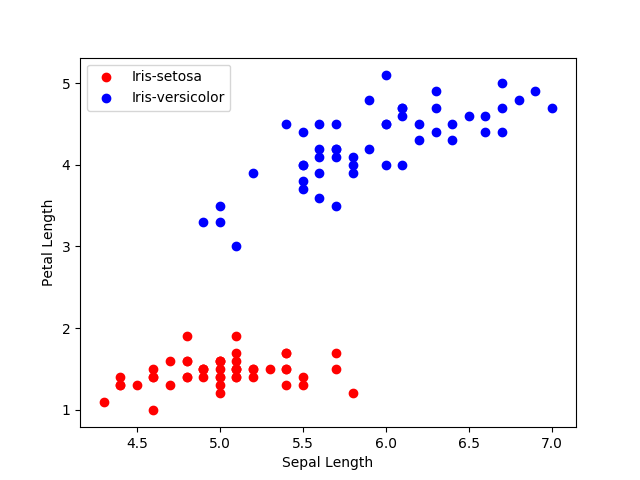

In [5]:
_ = plt.scatter(X[0:50,0], X[0:50,1], color='red', marker='o', label='Iris-setosa')
_ = plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='o', label='Iris-versicolor')
_ = plt.xlabel('Sepal Length')
_ = plt.ylabel('Petal Length')
_ = plt.legend()

In [6]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

<IPython.core.display.Javascript object>


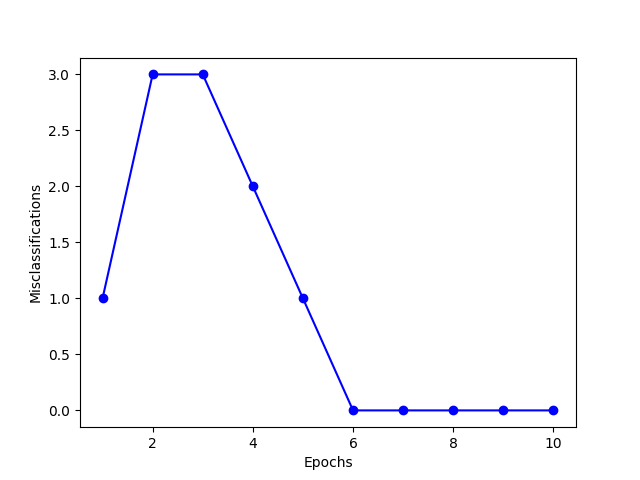

In [10]:
_ = plt.plot(range(1, len(ppn.error_)+1), ppn.error_, color='blue', marker='o')
_ = plt.xlabel('Epochs')
_ = plt.ylabel('Misclassifications')

<IPython.core.display.Javascript object>


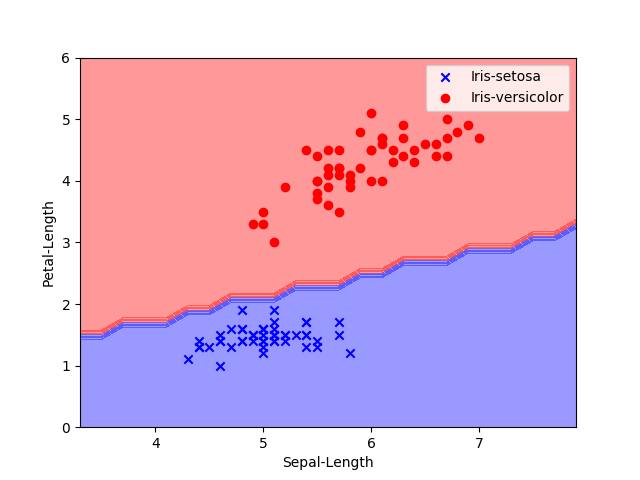

In [11]:
markers = ['s', 'x', 'o', '^', 'v']
colors = ['red', 'blue', 'lightgreen', 'gray', 'cyan']
cmap = ListedColormap(colors[:len(np.unique(y))])
resolution = 0.2
classifier = ppn

"""
Plot Decision Surface
Find minimum and maximum values on x axis
"""
x1_min, x1_max = X[:,0].min()-1, X[:,0].max()+1

"""
Find mimimum and maximum values on y axis
"""
x2_min, x2_max = X[:,1].min()-1, X[:,1].max()+1

xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)

_ = plt.contourf(xx1, xx2, Z, cmap=cmap, alpha=0.4)
_ = plt.xlim(xx1.min(), xx1.max())
_ = plt.ylim(xx2.min(), xx2.max())

"""
Plot class samples
"""
_ = plt.scatter(X[0:50,0], X[0:50,1], color='blue', marker='x', label='Iris-setosa')
_ = plt.scatter(X[50:100, 0], X[50:100, 1], color='red', marker='o', label='Iris-versicolor')

_ = plt.xlabel('Sepal-Length')
_ = plt.ylabel('Petal-Length')
_ = plt.legend()
_ = plt.show()

### Perceptron using Scikit-Learn

#### Loading Dataset using sklearns built in datasets

In [23]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### Standard Scaler using preprocessing model

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [26]:
from sklearn.linear_model import Perceptron

In [27]:
ppn = Perceptron(max_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=40, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [28]:
y_pred = ppn.predict(X_test_std)

In [29]:
print("Misclassified Samples: ", (y_pred != y_test).sum())

Misclassified Samples:  4


In [30]:
from sklearn.metrics import accuracy_score
print("Accuracy: %.3f" %(accuracy_score(y_test, y_pred)*100))

Accuracy: 91.111


In [31]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_region(X, y, classifier, test_idx=None, resolution=0.2):
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    markers = ('s', 'x', 'o', '^', 'v')
    
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    """
    Plot the decision surface region
    """
    
    x1_min, x1_max = X[:,0].min(), X[:,0].max()
    x2_min, x2_max = X[:,1].min(), X[:,1].max()
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([np.ravel(xx1), np.ravel(xx2)]).T)
    Z = Z.reshape(xx1.shape)
    _ = plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    _ = plt.xlim(xx1.min(), xx1.max())
    _ = plt.ylim(xx2.min(), xx2.max())
    
    """
    Plot sample points
    """
    X_test, y_test = X[test_idx, 0], y[test_idx]
    for idx, c1 in enumerate(np.unique(y)):
        _ = plt.scatter(x=X[y==c1, 0], y=X[y==c1, 1], marker=markers[idx], c=cmap(idx), label=c1)
    
    """
    Highlight test points
    """
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='gray', alpha=0.8, linewidth=1, marker='o', s=55, label='test set')

In [32]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined_std = np.hstack((y_train, y_test))

<IPython.core.display.Javascript object>


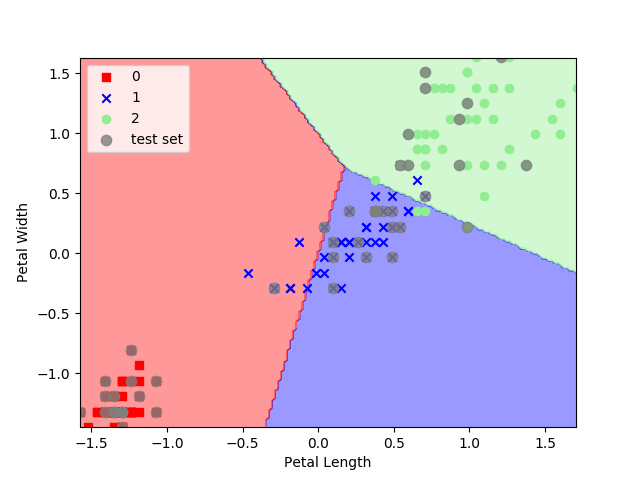

In [33]:
_ = plot_decision_region(X=X_combined_std,
                     y=y_combined_std,
                     classifier=ppn,
                     resolution=0.02,
                     test_idx=range(105,150))

_ = plt.xlabel('Petal Length')
_ = plt.ylabel('Petal Width')
_ = plt.legend()